In [91]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func

In [20]:
import numpy as np
import pandas as pd

In [47]:
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [48]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [49]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [50]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables

In [51]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [100]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [101]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x0000024B0B22A610>, 'station': 'USC00519397', 'tobs': 81.0, 'id': 2724, 'date': '2017-08-23', 'prcp': 0.0}
            Precipitation
2016-08-23           0.70
2016-08-23           0.00
2016-08-23           0.15
2016-08-23           1.79
2016-08-23           0.02
...                   ...
2017-08-22           0.00
2017-08-23           0.45
2017-08-23           0.08
2017-08-23           0.00
2017-08-23           0.00

[2021 rows x 1 columns]


Text(0, 0.5, 'Inches')

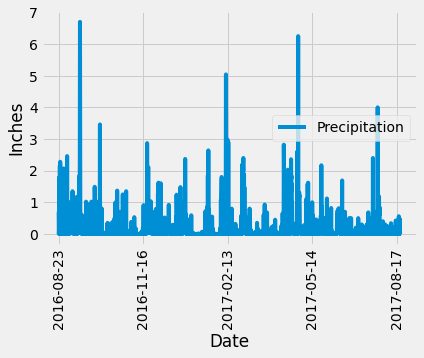

In [180]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
first_row = session.query(Measurement).order_by(sqlalchemy.desc(Measurement.date)).first() 
print(first_row.__dict__)


date=[]
precpitation = []

#date = dt.strptime('2016-08-23', '%Y-%m-%d')

for row in session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').order_by(sqlalchemy.desc(Measurement.date)):#.limit(15).all():
    date.append(row[0])
    precpitation.append(row[1])
    #print(row)

data ={'Precipitation': precpitation,
      }
df = pd.DataFrame(data, index = date)
df= df.sort_index(ascending=True)
df = df.dropna()

print(df)
xticks = ["2016-08-23","2016-10-01","2016-11-09","2016-12-19","2017-01-28","2017-03-09","2017-04-18","2017-05-31","2017-07-10"]
ax = df.plot(rot =90)
ax.set_xlabel("Date")
ax.set_ylabel("Inches")


#plt.xticks(xticks)
#plot.show(block=True)
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [103]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [117]:
# Design a query to show how many stations are available in this dataset?
first_row = session.query(Station).first() 
print(first_row.__dict__)

session.query(Station.station).count()

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x0000024B0CFA3CA0>, 'id': 1, 'name': 'WAIKIKI 717.2, HI US', 'longitude': -157.8168, 'latitude': 21.2716, 'station': 'USC00519397', 'elevation': 3.0}


9

In [116]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(sqlalchemy.desc(func.count(Measurement.station))).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [135]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
print(session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all())
print(session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all())
session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0,)]
[(85.0,)]


[(71.66378066378067,)]

('2016-08-23', 77.0)
('2016-08-24', 77.0)
('2016-08-25', 80.0)
('2016-08-26', 80.0)
('2016-08-27', 75.0)
('2016-08-28', 73.0)
('2016-08-29', 78.0)
('2016-08-30', 77.0)
('2016-08-31', 78.0)
('2016-09-01', 80.0)
('2016-09-02', 80.0)
('2016-09-03', 78.0)
('2016-09-04', 78.0)
('2016-09-05', 78.0)
('2016-09-06', 73.0)
('2016-09-07', 74.0)
('2016-09-08', 80.0)
('2016-09-09', 79.0)
('2016-09-10', 77.0)
('2016-09-11', 80.0)
('2016-09-12', 76.0)
('2016-09-13', 79.0)
('2016-09-14', 75.0)
('2016-09-15', 79.0)
('2016-09-16', 78.0)
('2016-09-17', 79.0)
('2016-09-18', 78.0)
('2016-09-19', 78.0)
('2016-09-20', 76.0)
('2016-09-21', 74.0)
('2016-09-22', 77.0)
('2016-09-23', 78.0)
('2016-09-24', 79.0)
('2016-09-25', 79.0)
('2016-09-26', 77.0)
('2016-09-27', 80.0)
('2016-09-28', 78.0)
('2016-09-29', 78.0)
('2016-09-30', 78.0)
('2016-10-01', 77.0)
('2016-10-02', 79.0)
('2016-10-03', 79.0)
('2016-10-04', 79.0)
('2016-10-05', 79.0)
('2016-10-06', 75.0)
('2016-10-07', 76.0)
('2016-10-08', 73.0)
('2016-10-09'

Text(0, 0.5, 'Frequency')

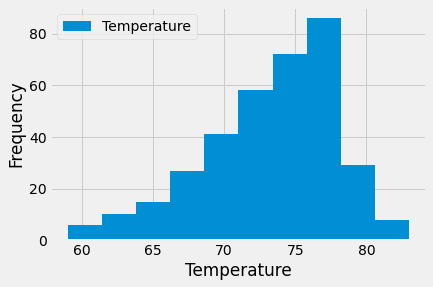

In [182]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

date2 = []
tob=[]

for row in session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281', Measurement.date >= '2016-08-23').order_by(sqlalchemy.asc(Measurement.date)):
    date2.append(row[0])
    tob.append(row[1])
    print(row)
data ={'Temperature': tob}
df = pd.DataFrame(data, index = date2)
df= df.sort_index(ascending=True)
df = df.dropna()
print(df.head())    
ax=df.plot.hist(rot = 0 )
ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency")

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
